In [207]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Loading the data
df = pd.read_csv('C:/Users/Admin/Desktop/Saiprakash/DT/aggregate_covid_country.csv')

In [209]:
#head returns the first 5 rows
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [210]:
#tail returns the last 5 rows
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [211]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

# Exploratory Data Analysis

In [212]:
#displaying total number of rows and columns
df.shape

(23688, 5)

In [213]:
#displaying datatype of each column
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [214]:
#checking for null values
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [215]:
#no null values

In [216]:
#statistical summary
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


# Data Visualizations

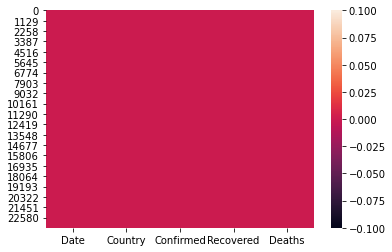

In [217]:
sns.heatmap(df.isnull())

In [218]:
#checking for unique values
df.nunique()

Date          126
Country       188
Confirmed    5308
Recovered    3303
Deaths       1768
dtype: int64

In [219]:
#checking the correlation
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


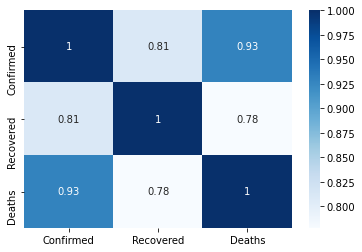

In [220]:
#visualizing the correlation
sns.heatmap(df.corr(),cmap='Blues',annot = True)

Recovered has least correlation

In [221]:
# checking for outliers

In [222]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Confirmed    730.0
Recovered    123.0
Deaths        13.0
dtype: float64


In [223]:
(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23675,2020-05-26,Uganda,253,69,0
23681,2020-05-26,Venezuela,1211,302,11
23682,2020-05-26,Vietnam,327,272,0
23684,2020-05-26,Western Sahara,9,6,1


In [224]:
df.shape

(23688, 5)

In [225]:
df1.shape

(17913, 5)

23688 rows reduced to 17913 rows.So,outliers are removed

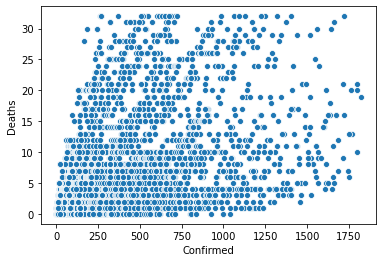

In [226]:
sns.scatterplot(data=df1,x='Confirmed',y='Deaths')

In [227]:
df1.skew()

Confirmed    3.505560
Recovered    3.862833
Deaths       3.664490
dtype: float64

less skewness

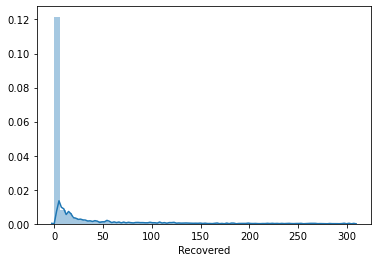

In [228]:
sns.distplot(df1['Recovered'])

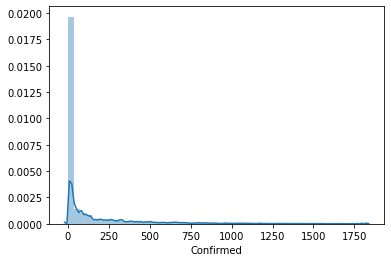

In [229]:
sns.distplot(df1['Confirmed'])

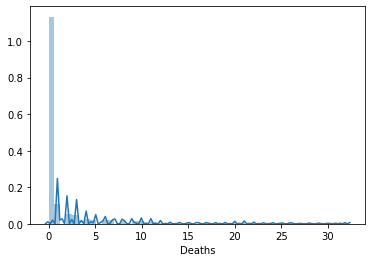

In [230]:
sns.distplot(df1['Deaths'])

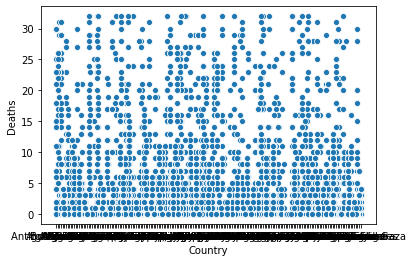

In [231]:
sns.scatterplot(data=df1,x='Country',y='Deaths')

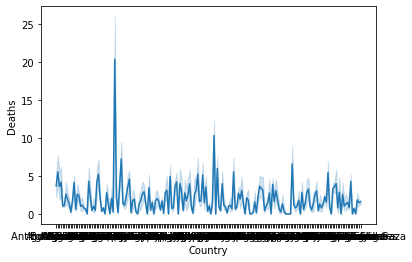

In [232]:
sns.lineplot(data=df1,x='Country',y='Deaths')

In the above lineplot,in almost every country deaths rose.

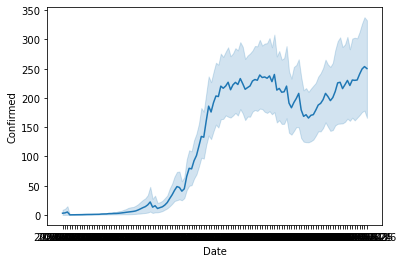

In [233]:
sns.lineplot(x='Date',y='Confirmed',data=df1)
plt.show()

In the above lineplot,Confirmed cases are increasing with Date

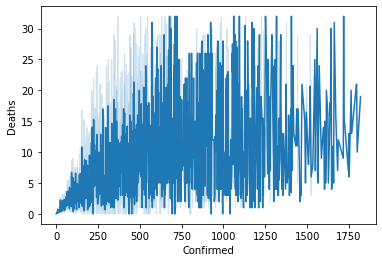

In [234]:
sns.lineplot(data=df1,x='Confirmed',y='Deaths')

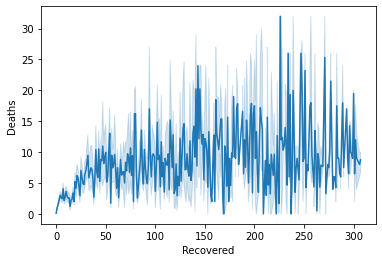

In [235]:
sns.lineplot(data=df1,x='Recovered',y='Deaths')

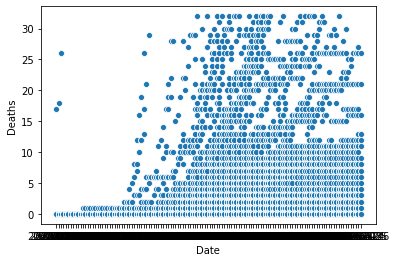

In [236]:
sns.scatterplot(data=df1,x='Date',y='Deaths')

Above Scatter plot looks some linear(Date vs Deaths)

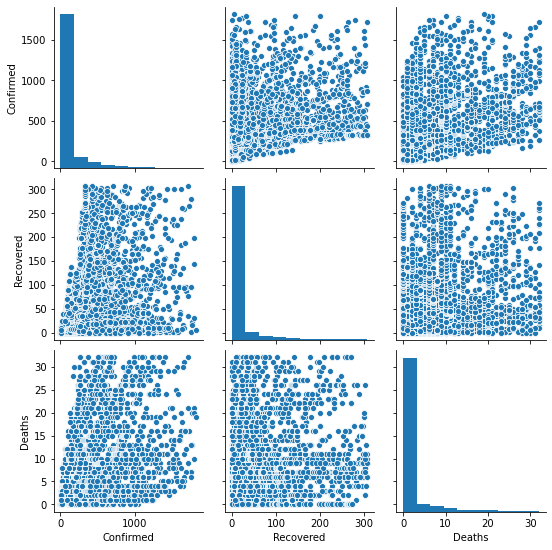

In [237]:
sns.pairplot(df1)

In [238]:
#Looking at the different locations
df1['Country'].value_counts()

Bhutan           126
Mauritania       126
Togo             126
Guinea-Bissau    126
Comoros          126
                ... 
Spain             48
Italy             39
Iran              37
Korea, South      37
China              3
Name: Country, Length: 188, dtype: int64

In [239]:
#Sorting data w.r.t total_deaths
max_cases_country=df1.sort_values(by="Deaths",ascending=False)
max_cases_country

,Date,Country,Confirmed,Recovered,Deaths
16082,2020-04-16,Lithuania,1128,178,32
14979,2020-04-10,North Macedonia,711,41,32
13761,2020-04-04,Colombia,1406,85,32
13869,2020-04-04,San Marino,259,27,32
16400,2020-04-18,Cuba,986,227,32
...,...,...,...,...,...
8050,2020-03-04,Slovenia,0,0,0
8051,2020-03-04,Somalia,0,0,0
8052,2020-03-04,South Africa,0,0,0
8053,2020-03-04,South Sudan,0,0,0


In [240]:
#Top 5 countries with maximum Deaths
max_cases_country[1:6]

,Date,Country,Confirmed,Recovered,Deaths
14979,2020-04-10,North Macedonia,711,41,32
13761,2020-04-04,Colombia,1406,85,32
13869,2020-04-04,San Marino,259,27,32
16400,2020-04-18,Cuba,986,227,32
16564,2020-04-19,Bolivia,520,31,32


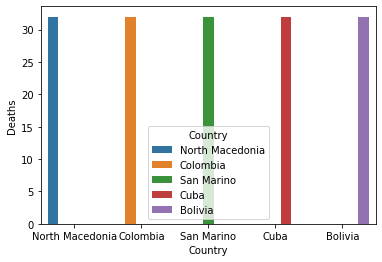

In [241]:
#Making bar-plot for countries with top cases
sns.barplot(x='Country',y='Deaths',data=max_cases_country[1:6],hue='Country')
plt.show()

In [242]:
#Getting the cases in India
india_case=df1[df1['Country']=='India'] 
india_case.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [243]:
india_case.tail()

,Date,Country,Confirmed,Recovered,Deaths
12111,2020-03-26,India,727,45,20
12299,2020-03-27,India,887,73,20
12487,2020-03-28,India,987,84,24
12675,2020-03-29,India,1024,95,27
12863,2020-03-30,India,1251,102,32


In [244]:
min_Deaths=df1[df1['Deaths']==0] 
min_Deaths

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23644,2020-05-26,Saint Vincent and the Grenadines,18,14,0
23650,2020-05-26,Seychelles,11,11,0
23669,2020-05-26,Timor-Leste,24,24,0
23675,2020-05-26,Uganda,253,69,0


In [245]:
min_Deaths.shape

(12989, 5)

In [246]:
#Linear regression
from sklearn.model_selection import train_test_split

In [247]:
#converting string date to date-time
import datetime as dt
india_case['Date'] = pd.to_datetime(india_case['Date']) 
india_case.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [248]:
#converting string date to date-time
import datetime as dt
df1['Date'] = pd.to_datetime(df1['Date']) 
df1.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [249]:
#converting date-time to ordinal
df1['Date']=df1['Date'].map(dt.datetime.toordinal)
df1.head()

,Date,Country,Confirmed,Recovered,Deaths
0,737446,Afghanistan,0,0,0
1,737446,Albania,0,0,0
2,737446,Algeria,0,0,0
3,737446,Andorra,0,0,0
4,737446,Angola,0,0,0


In [250]:
df1.tail()

,Date,Country,Confirmed,Recovered,Deaths
23675,737571,Uganda,253,69,0
23681,737571,Venezuela,1211,302,11
23682,737571,Vietnam,327,272,0
23684,737571,Western Sahara,9,6,1
23687,737571,Zimbabwe,56,25,4


In [251]:
#getting dependent variable and inpedent variable
x=df1['Date']
y=df1['Deaths']

In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=40)

In [253]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [254]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [255]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [256]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('r2_score:',r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score: 0.1558264327879536
MAE: 2.3727397782302826
MSE: 19.090108080890825
RMSE: 4.369222823442497


In [257]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
y_pred=dtr.predict(np.array(x_test).reshape(-1,1))

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', r2_score(y_test,y_pred))

MAE: 2.088389521396329
MSE: 18.804562925081918
RMSE: 4.336422825910997
r2_score: 0.16845337401625482


Conclusion:

==>DecisionTreeRegressor model have less errors it works best

==>As the date changes i.e., days are increasing confirmed,Recovered are increasing.But,Deaths are not increasing much.

In [258]:
#saving the best model with DecisionTreeRegressor,since it have less errors

In [259]:
#importing joblib
import joblib

#saving the model in a pickle file
joblib.dump(dtr, 'aggregate_covid_country_analysis.pkl')

['aggregate_covid_country_analysis.pkl']